# Process new data from liulin

In [3]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import xml.etree.ElementTree as ET
from glob import glob
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 0. Replace strings in the navigation data files (XML parser helper)

In [115]:
# This is necesary to run only for data from year 2015

# process all directories
for directory in glob('./data/*/'): # search for measurement runs
    for file in glob(directory + 'Navigation data/*.xml'): #search for navigation data
        print file
        #fileoutput = './output/' + file.split('/')[4]

        with open(file) as f:
            newText=f.read().replace('" XML_LMARK "', '<')
        with open(file, "w") as f:
            f.write(newText)

        with open(file) as f:
            newText=f.read().replace('" XML_RMARK "', '>')
        with open(file, "w") as f:
            f.write(newText)

        with open(file) as f:
            newText=f.read().replace('" XML_RMARK"', '>')
        with open(file, "w") as f:
            f.write(newText)
            
        with open(file) as f:
            newText=f.read().replace('" XML_HEADER "', '<?xml version="1.0" encoding="utf-8"?>')
        with open(file, "w") as f:
            f.write(newText)

./data/48. (17. 03. 2017-16. 04 2017)/Navigation data/RAD_OK-YBA_190_2017-04-08.xml
./data/48. (17. 03. 2017-16. 04 2017)/Navigation data/RAD_OK-YBA_190_2017-03-25.xml
./data/48. (17. 03. 2017-16. 04 2017)/Navigation data/RAD_OK-YBA_190_2017-03-19.xml
./data/48. (17. 03. 2017-16. 04 2017)/Navigation data/RAD_OK-YBA_190_2017-03-26.xml
./data/48. (17. 03. 2017-16. 04 2017)/Navigation data/RAD_OK-YBA_190_2017-04-06.xml
./data/48. (17. 03. 2017-16. 04 2017)/Navigation data/RAD_OK-YBA_190_2017-03-23.xml
./data/48. (17. 03. 2017-16. 04 2017)/Navigation data/RAD_OK-YBA_190_2017-03-16.xml
./data/48. (17. 03. 2017-16. 04 2017)/Navigation data/RAD_OK-YBA_190_2017-03-28.xml
./data/48. (17. 03. 2017-16. 04 2017)/Navigation data/RAD_OK-YBA_190_2017-04-09.xml
./data/48. (17. 03. 2017-16. 04 2017)/Navigation data/RAD_OK-YBA_190_2017-03-30.xml
./data/48. (17. 03. 2017-16. 04 2017)/Navigation data/RAD_OK-YBA_190_2017-04-04.xml
./data/48. (17. 03. 2017-16. 04 2017)/Navigation data/RAD_OK-YBA_190_2017-03

./data/43. (18. 03. 2015-20. 06. 2015)/Navigation data/RAD_OK-YBA_190_2015-04-12.xml
./data/43. (18. 03. 2015-20. 06. 2015)/Navigation data/RAD_OK-YBA_190_2015-04-28.xml
./data/43. (18. 03. 2015-20. 06. 2015)/Navigation data/RAD_OK-YBA_190_2015-03-19.xml
./data/43. (18. 03. 2015-20. 06. 2015)/Navigation data/RAD_OK-YBA_191_2015-06-04.xml
./data/43. (18. 03. 2015-20. 06. 2015)/Navigation data/RAD_OK-YBA_191_2015-05-03.xml
./data/43. (18. 03. 2015-20. 06. 2015)/Navigation data/RAD_OK-YBA_191_2015-05-26.xml
./data/43. (18. 03. 2015-20. 06. 2015)/Navigation data/RAD_OK-YBA_191_2015-04-28.xml
./data/43. (18. 03. 2015-20. 06. 2015)/Navigation data/RAD_OK-YBA_191_2015-03-29.xml
./data/43. (18. 03. 2015-20. 06. 2015)/Navigation data/RAD_OK-YBA_191_2015-05-05.xml
./data/43. (18. 03. 2015-20. 06. 2015)/Navigation data/RAD_OK-YBA_190_2015-06-18.xml
./data/43. (18. 03. 2015-20. 06. 2015)/Navigation data/RAD_OK-YBA_191_2015-03-26.xml
./data/43. (18. 03. 2015-20. 06. 2015)/Navigation data/RAD_OK-YBA

./data/45. (03. 04. 2016-27. 05. 2016)/Navigation data/RAD_OK-YBA_191_2016-05-03.xml
./data/45. (03. 04. 2016-27. 05. 2016)/Navigation data/RAD_OK-YBA_191_2016-03-13.xml
./data/45. (03. 04. 2016-27. 05. 2016)/Navigation data/RAD_OK-YBA_191_2016-04-24.xml
./data/45. (03. 04. 2016-27. 05. 2016)/Navigation data/RAD_OK-YBA_191_2016-03-04.xml
./data/45. (03. 04. 2016-27. 05. 2016)/Navigation data/RAD_OK-YBA_190_2016-03-06.xml
./data/45. (03. 04. 2016-27. 05. 2016)/Navigation data/RAD_OK-YBA_191_2016-05-27.xml
./data/45. (03. 04. 2016-27. 05. 2016)/Navigation data/RAD_OK-YBA_190_2016-04-14.xml
./data/45. (03. 04. 2016-27. 05. 2016)/Navigation data/RAD_OK-YBA_191_2016-05-17.xml
./data/45. (03. 04. 2016-27. 05. 2016)/Navigation data/RAD_OK-YBA_190_2016-04-03.xml
./data/45. (03. 04. 2016-27. 05. 2016)/Navigation data/RAD_OK-YBA_191_2016-04-29.xml
./data/45. (03. 04. 2016-27. 05. 2016)/Navigation data/RAD_OK-YBA_191_2016-04-12.xml
./data/45. (03. 04. 2016-27. 05. 2016)/Navigation data/RAD_OK-YBA

./data/44. (29. 06. 2015-24. 09. 2015)/Navigation data/RAD_OK-YBA_191_2015-08-30.xml
./data/44. (29. 06. 2015-24. 09. 2015)/Navigation data/RAD_OK-YBA_191_2015-07-10.xml
./data/44. (29. 06. 2015-24. 09. 2015)/Navigation data/RAD_OK-YBA_191_2015-09-22.xml
./data/44. (29. 06. 2015-24. 09. 2015)/Navigation data/RAD_OK-YBA_190_2015-09-19.xml
./data/44. (29. 06. 2015-24. 09. 2015)/Navigation data/RAD_OK-YBA_190_2015-07-25.xml
./data/44. (29. 06. 2015-24. 09. 2015)/Navigation data/RAD_OK-YBA_190_2015-07-23.xml
./data/44. (29. 06. 2015-24. 09. 2015)/Navigation data/RAD_OK-YBA_190_2015-08-20.xml
./data/44. (29. 06. 2015-24. 09. 2015)/Navigation data/RAD_OK-YBA_191_2015-08-02.xml
./data/44. (29. 06. 2015-24. 09. 2015)/Navigation data/RAD_OK-YBA_190_2015-09-22.xml
./data/44. (29. 06. 2015-24. 09. 2015)/Navigation data/RAD_OK-YBA_191_2015-09-04.xml
./data/44. (29. 06. 2015-24. 09. 2015)/Navigation data/RAD_OK-YBA_190_2015-07-30.xml
./data/44. (29. 06. 2015-24. 09. 2015)/Navigation data/RAD_OK-YBA

# 1. Calculation of doserate and concatenate dosimetric data with navigation data for all subdirectories

----------------------------------------------------------------------
./data/48. (17. 03. 2017-16. 04 2017)/
2017-03-17 16:13:00
RUN  48
MDU-07  EXPOSITION = 60[sec]

----------------------------------------------------------------------
./data/43. (18. 03. 2015-20. 06. 2015)/
2015-03-18 06:55:00
RUN  43
MDU-07  EXPOSITION = 300[sec]

----------------------------------------------------------------------
./data/49. 20170825/
2017-08-25 17:08:00
RUN  49
MDU-07  EXPOSITION = 300[sec]

----------------------------------------------------------------------
./data/46. (01. 06. 2016-30. 06. 2016)/
2016-06-01 10:18:00
RUN  46
MDU-07  EXPOSITION = 30[sec]

----------------------------------------------------------------------
./data/45. (03. 04. 2016-27. 05. 2016)/
2016-03-04 22:49:00
RUN  45
MDU-07  EXPOSITION = 300[sec]

----------------------------------------------------------------------
./data/47. (24. 9. 2016 -1. 11. 2016)/
2016-09-24 05:51:00
RUN  47
MDU-07  EXPOSITION = 60[sec]

----

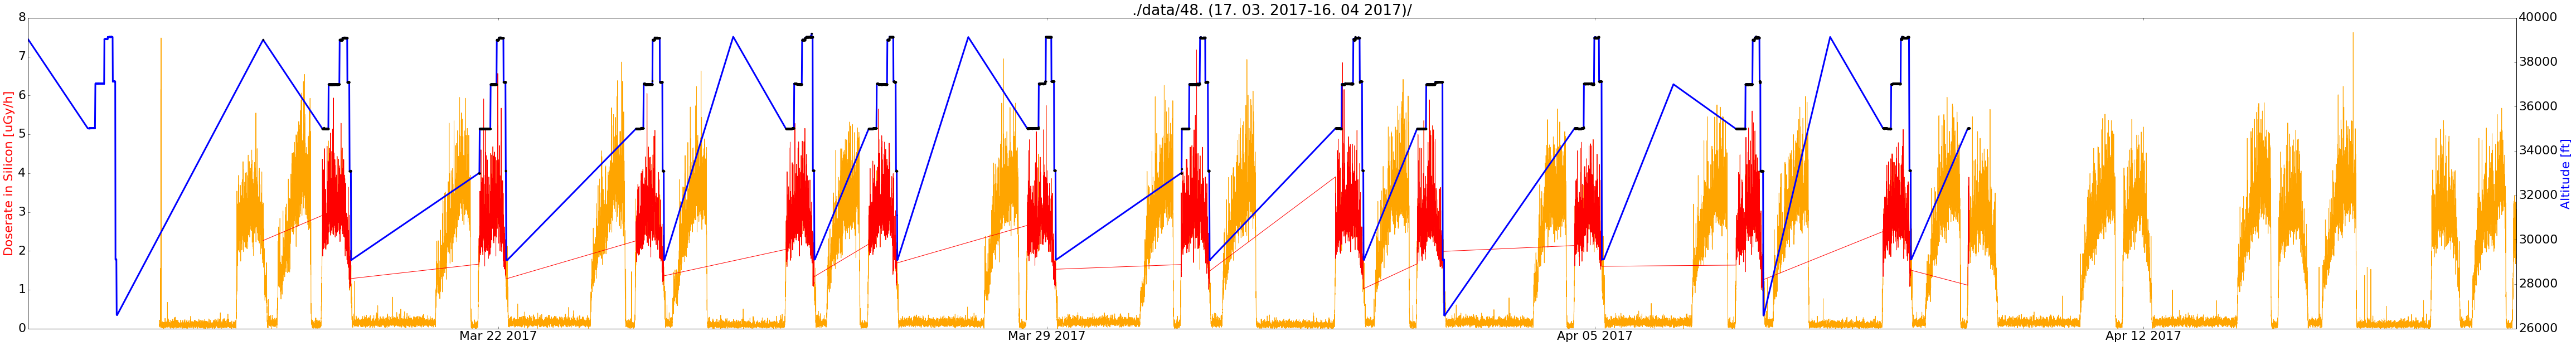

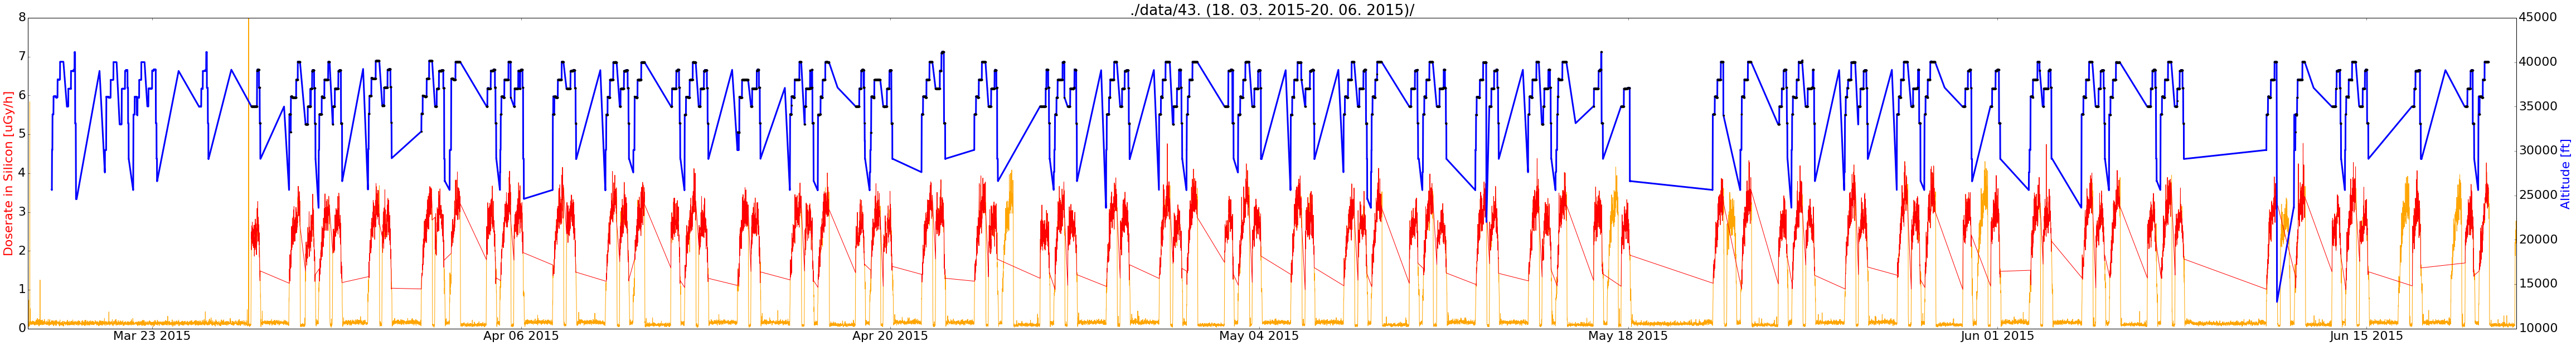

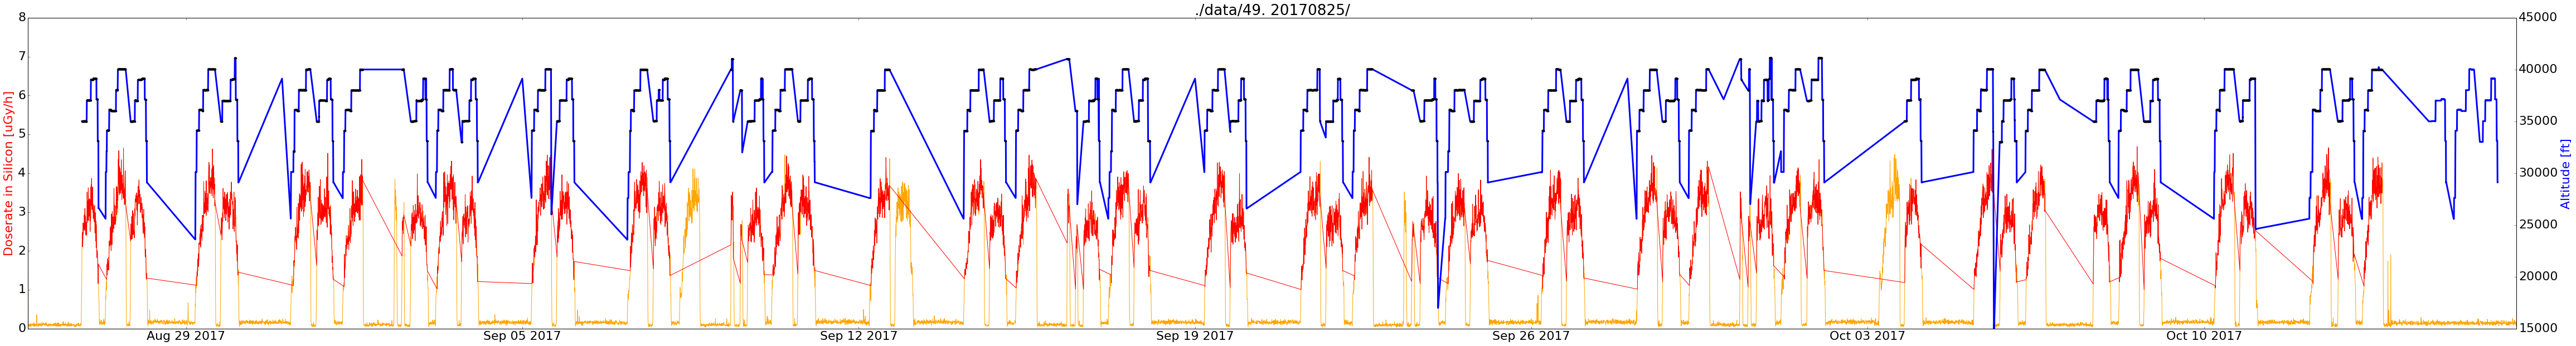

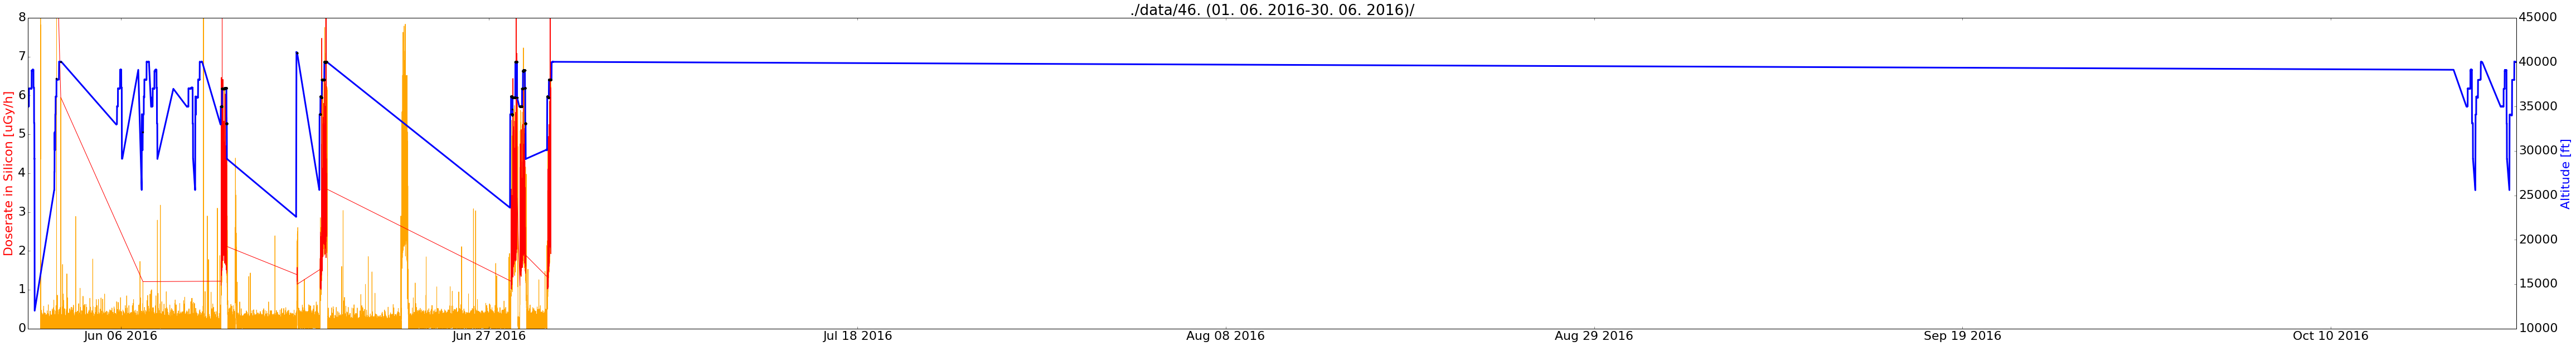

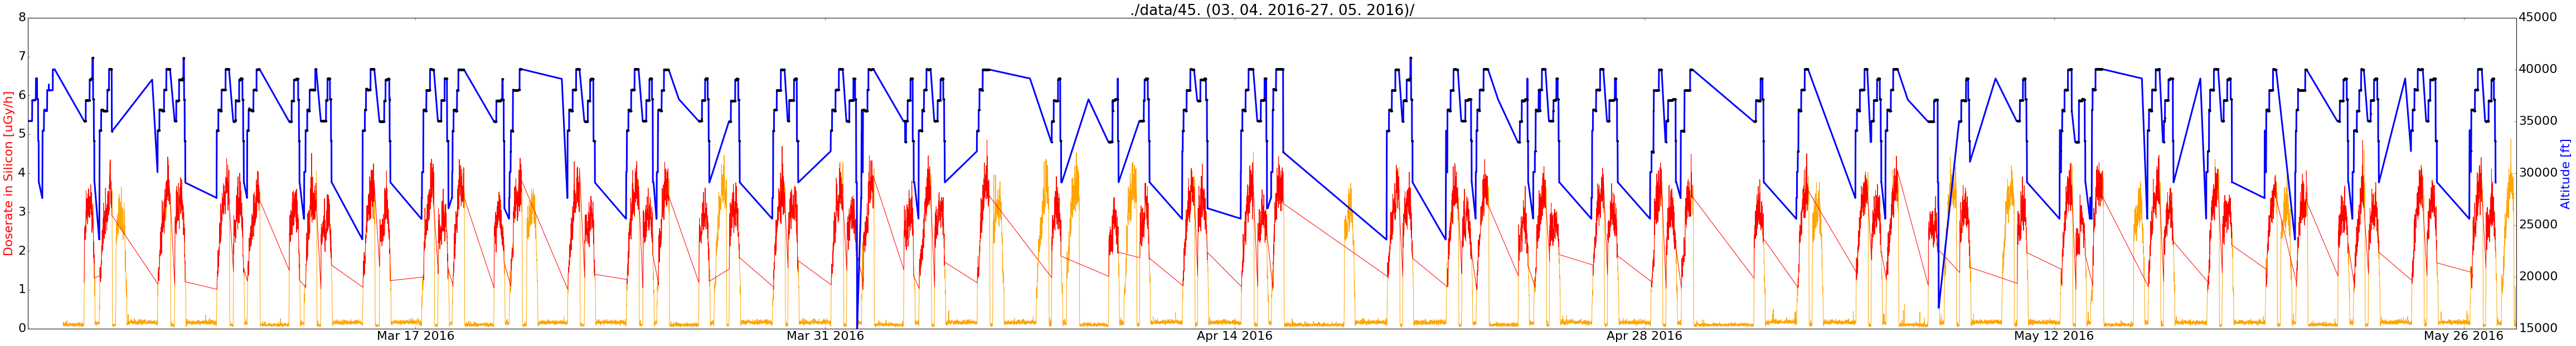

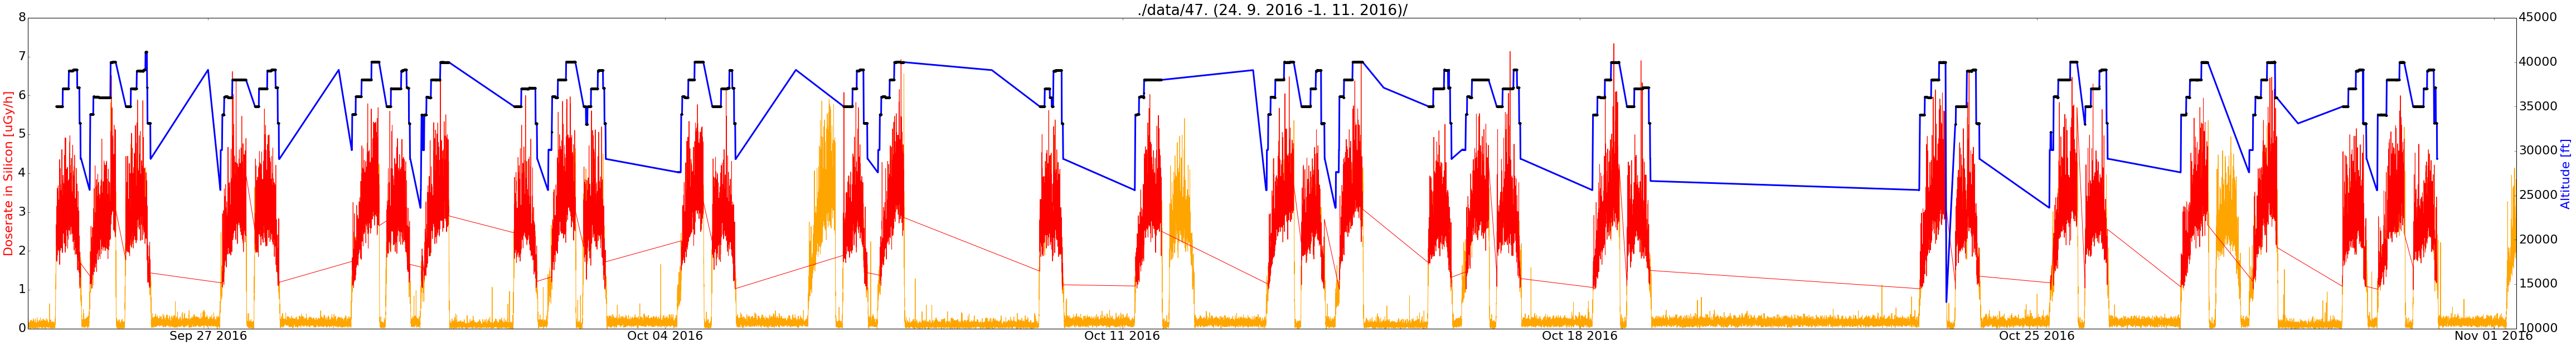

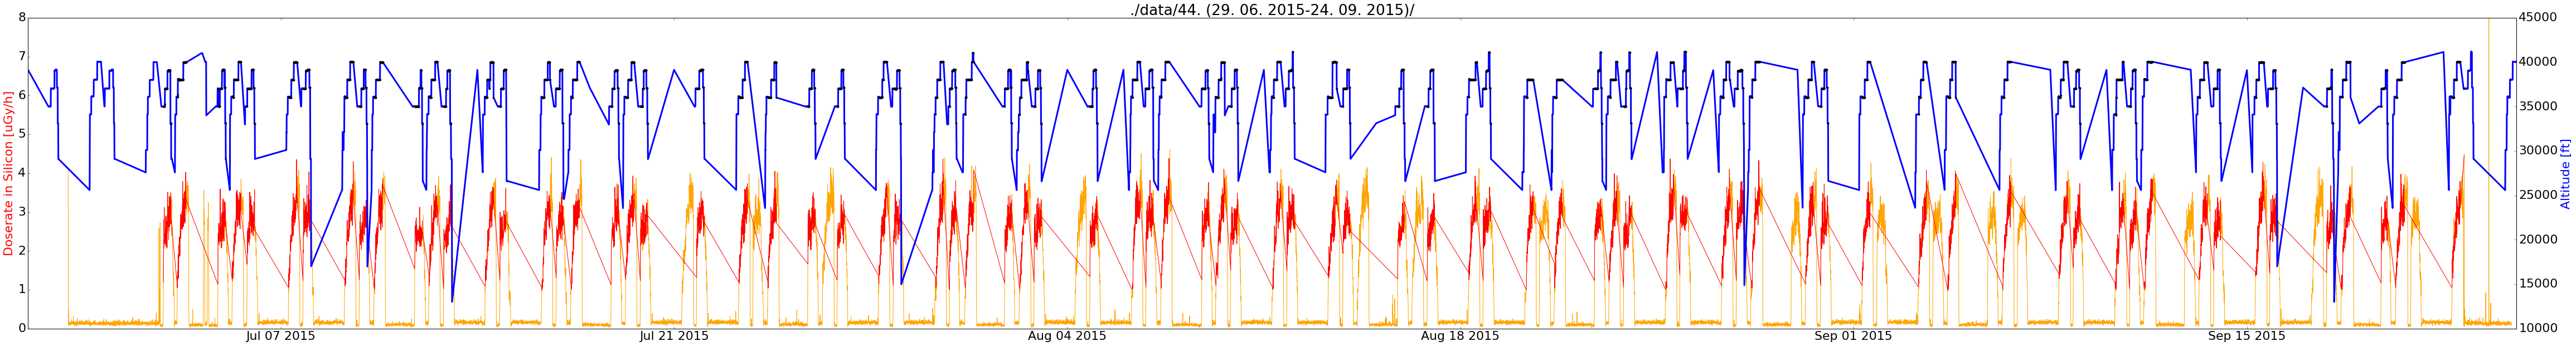

In [5]:
def round_dt(dt): # round time to whole minutes
    dt = dt + datetime.timedelta(seconds=30, microseconds=999999)
    dt = dt.replace(second=0, microsecond=0)
    return dt


# process all directories

for directory in glob('./data/*/'): # search for measurement runs
    for filename in glob( directory + 'Liulin/*.y*'): # search for Liuline files

        print '----------------------------------------------------------------------'
        print directory
        # parse Run number from the directory name
        run = directory.split('/')
        run = run[2].split('(')
        run = run[0].split('.')
        
        # extract time from Liulin filename
        path = filename.split('/')
        time = path[-1].split('.')
        date_object = datetime.datetime.strptime(time[0], '%y%m%d%H%M')
        print date_object
        print 'RUN ', run[0]
        
        # read data from Liulin 
        liulin = pd.read_csv(filename, header = None, sep = ' ', skiprows = 1) # read Liulin data Y
        liulin = liulin.drop(256, axis=1) # delete last empty column
        infile = open(filename, 'r')
        header = infile.readline()
        print header # print data header
        exposition = header.split(' ')[4].split('[')[0] # extract exposition time  
        exposition_val = float(exposition)
        exposition += 'S'
        
        # sum energy
        energy_scale = np.linspace(0.0407, 20.7977, 256)    # 0.0814 MeV per channel
        uGy_const = 1.602e-7 / 1.398e-4 * (3600/exposition_val)     # to uGy/h for given exposition
        liulin_energy = liulin
        liulin_energy = liulin_energy.multiply(energy_scale)
        liulin[256] = liulin_energy.sum(axis=1) * uGy_const # DSi
        liulin[257] = liulin_energy.ix[:,0:11].sum(axis=1) * uGy_const * 1.7 + liulin_energy.ix[:,12:255].sum(axis=1) * uGy_const * 6.1 # H
       
        # index liulin data (compute time)
        liulin_data = pd.DataFrame(index = pd.date_range(date_object, freq=exposition, periods=len(liulin)).tolist(), data = liulin.as_matrix())


    # Parse Navigation data
    nav_data = pd.DataFrame()
    
    for file in glob(directory + 'Navigation data/*.xml'): #search for navigation data
        #print file
        try:
            tree = ET.parse(file) # parse XML
            values = tree.findall('./FlightTrack/Position')
    
            data = pd.DataFrame({
                             #'time' : round_dt(datetime.datetime.strptime(value.find('Time').text, "%Y-%m-%d %H:%M:%S")), 
                             #'line' : tree.find('./FlightInfo/FlightLine').text, # !!! IMZ
                             'from' : tree.findtext('./FlightInfo/Org',default='XXX'),
                             'to' : tree.findtext('./FlightInfo/Dst',default='XXX'),
                             'lon' : [value.find('Longtitude').text for value in values],
                             'lat' : [value.find('Latitude').text for value in values],
                             'alt' : [value.find('Baralt').text for value in values],
                             }, index=[round_dt(datetime.datetime.strptime(value.find('Time').text, "%Y-%m-%d %H:%M:%S")) for value in values])
        
            nav_data = pd.concat([data,nav_data]) # add nav_data from one file
        except:
            print 'ERROR parse XML: ' + file
            print sys.exc_info()
            continue
                     
    # Merge data
    data = nav_data.join(liulin_data) # merge liulin data with navigation data
    data.rename(columns={256: 'DSi', 257: 'H'}, inplace=True)
    data = data.dropna(subset=[7]) # delele NaN lines
    #data.index.name = 'time'
    #data = data.sort_index() # sort by time
    try:
        data['flight'] = '*' + data['from'] + data['to']
        data['E'] = 0.0
    except:
        print 'ERROR no data:', directory
        print
        continue
    
    # rearrange culomns    
    out = data[['flight','lat','lon','alt','DSi','H', 'E']+list(xrange(256))]
    # filtering
    out = out.loc[out.DSi > 1]   # filtering of low radiation (an airplane is possibly on the groung)
    out.alt = pd.to_numeric(out.alt, errors='coerce')
    out = out.loc[out.alt > 32000]   # filtering of low altitude (9 753 m - transient level - ascent/descent)
    out.reset_index(inplace=True)
    # rename and reindex
    out.columns = ['date','Flight','lat','lon','alt','DSi[uGy/h]','H*(10)[uSv/h]','E(CARI)[uSv/h]']+list(xrange(1,257))
    out.set_index('date',inplace=True)
    out.sort_index(inplace=True) # sort by time

    # save
    out.to_csv('./output/Run' + run[0] + '.txt', sep='\t') # save merged data to output directory

    nav_data.alt = pd.to_numeric(nav_data.alt, errors='coerce')
    nav_data=nav_data.sort_index()
    plt.figure(figsize=(80, 10))
    matplotlib.rcParams.update({'font.size': 22})
    plt.plot(liulin_data[256],c='orange')
    plt.plot(out['DSi[uGy/h]'],c='red')
    plt.ylabel('Doserate in Silicon [uGy/h]', color='red')
    plt.ylim(0, 8)
    plt.twinx()
    plt.plot(nav_data['alt'], c='blue', lw=3)
    plt.plot(out['alt'],c='black', linestyle='', marker='.')
    plt.ylabel('Altitude [ft]', color='blue')
    plt.title(directory)  



# 2. Concatenate Runs files to the one file

In [ ]:
import fileinput
import glob

filenames = glob.glob("./data/Run*.txt")
filenames = sorted(filenames)
print filenames
outfilename = './data/AllRun.txt'

with open(outfilename, 'w') as fout:
    line = 'date	flight	lat	lon	alt	DSi	H	E	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	100	101	102	103	104	105	106	107	108	109	110	111	112	113	114	115	116	117	118	119	120	121	122	123	124	125	126	127	128	129	130	131	132	133	134	135	136	137	138	139	140	141	142	143	144	145	146	147	148	149	150	151	152	153	154	155	156	157	158	159	160	161	162	163	164	165	166	167	168	169	170	171	172	173	174	175	176	177	178	179	180	181	182	183	184	185	186	187	188	189	190	191	192	193	194	195	196	197	198	199	200	201	202	203	204	205	206	207	208	209	210	211	212	213	214	215	216	217	218	219	220	221	222	223	224	225	226	227	228	229	230	231	232	233	234	235	236	237	238	239	240	241	242	243	244	245	246	247	248	249	250	251	252	253	254	255	256\n'    
    fout.write(line)
    for line in fileinput.input(filenames):
        if line[0] != 'd':
            fout.write(line)
    

## Experimental code with plotly

In [108]:
import plotly.plotly as py
import plotly.graph_objs as go
%pylab inline

def round_dt(dt): # round time to whole minutes
    dt = dt + datetime.timedelta(seconds=30, microseconds=999999)
    dt = dt.replace(second=0, microsecond=0)
    return dt


# process all directories

for directory in glob('./data/43.*/'): # search for measurement runs
    for filename in glob( directory + 'Liulin/*.y*'): # search for Liuline files

        print '----------------------------------------------------------------------'
        print directory
        # parse Run number from the directory name
        run = directory.split('/')
        run = run[2].split('(')
        run = run[0].split('.')
        
        # extract time from Liulin filename
        path = filename.split('/')
        time = path[-1].split('.')
        date_object = datetime.datetime.strptime(time[0], '%y%m%d%H%M')
        print date_object
        print 'RUN ', run[0]
        
        # read data from Liulin 
        liulin = pd.read_csv(filename, header = None, sep = ' ', skiprows = 1) # read Liulin data Y
        liulin = liulin.drop(256, axis=1) # delete last empty column
        infile = open(filename, 'r')
        header = infile.readline()
        print header # print data header
        exposition = header.split(' ')[4].split('[')[0] # extract exposition time  
        exposition_val = float(exposition)
        exposition += 'S'
        
        # sum energy
        energy_scale = np.linspace(0.0407, 20.7977, 256)    # 0.0814 MeV per channel
        uGy_const = 1.602e-7 / 1.398e-4 * (3600/exposition_val)     # to uGy/h for given exposition
        liulin_energy = liulin
        liulin_energy = liulin_energy.multiply(energy_scale)
        liulin[256] = liulin_energy.sum(axis=1) * uGy_const # DSi
        liulin[257] = liulin_energy.ix[:,0:11].sum(axis=1) * uGy_const * 1.7 + liulin_energy.ix[:,12:255].sum(axis=1) * uGy_const * 6.1 # H
       
        # index liulin data (compute time)
        liulin_data = pd.DataFrame(index = pd.date_range(date_object, freq=exposition, periods=len(liulin)).tolist(), data = liulin.as_matrix())


    # Parse Navigation data
    nav_data = pd.DataFrame()
    
    for file in glob(directory + 'Navigation data/*.xml'): #search for navigation data
        #print file
        try:
            tree = ET.parse(file) # parse XML
            values = tree.findall('./FlightTrack/Position')
    
            data = pd.DataFrame({
                             #'time' : round_dt(datetime.datetime.strptime(value.find('Time').text, "%Y-%m-%d %H:%M:%S")), 
                             #'line' : tree.find('./FlightInfo/FlightLine').text, # !!! IMZ
                             'from' : tree.findtext('./FlightInfo/Org',default='XXX'),
                             'to' : tree.findtext('./FlightInfo/Dst',default='XXX'),
                             'lon' : [value.find('Longtitude').text for value in values],
                             'lat' : [value.find('Latitude').text for value in values],
                             'alt' : [value.find('Baralt').text for value in values],
                             }, index=[round_dt(datetime.datetime.strptime(value.find('Time').text, "%Y-%m-%d %H:%M:%S")) for value in values])
        
            nav_data = pd.concat([data,nav_data]) # add nav_data from one file
        except:
            print 'ERROR parse XML: ' + file
            print sys.exc_info()
            continue

nav_data=nav_data.sort_index()

data = [
    go.Scatter(
        x=liulin_data.index,
        y=liulin_data[256],
        name='rad',
        yaxis='y'
    ),
    go.Scatter(
        x=nav_data.index,
        y=nav_data.alt,
        #mode = 'lines+markers',
        mode = 'lines',
        marker = dict(symbol='circle-dot'),
        name='alt',
        yaxis='y2'
    ),
]

layout = go.Layout(
    title='liulin',
    yaxis=dict(
        title='doserate'
    ),
    yaxis2=dict(
        title='altitude',
        overlaying='y',
        side='right'
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='ble')


Populating the interactive namespace from numpy and matplotlib
----------------------------------------------------------------------
./data/43. (18. 03. 2015-20. 06. 2015)/
2015-03-18 06:55:00
RUN  43
MDU-07  EXPOSITION = 300[sec]

The draw time for this plot will be slow for all clients.


In [124]:
out.alt = pd.to_numeric(out.alt, errors='coerce')
out.loc[out.alt > 40000.00]

#out.loc[data.DSi > 4]

,Flight,lat,lon,alt,DSi[uGy/h],H*(10)[uSv/h],E(CARI)[uSv/h],1,2,3,...,247,248,249,250,251,252,253,254,255,256
date,,,,,,,,,,,,,,,,,,,,,
2015-07-03 13:38:00,*ICN,56.9602,36.5474,40004,2.944977,7.505940,0,0,142,224,...,0,0,0,0,0,0,0,0,0,0
2015-07-03 14:03:00,*ICN,55.4124,31.0101,40008,2.796664,7.211946,0,0,143,232,...,0,0,0,0,0,0,0,0,0,0
2015-07-03 14:08:00,*ICN,55.1222,29.9239,40004,2.838639,6.879447,0,0,130,202,...,0,0,0,0,0,0,0,0,0,0
2015-07-03 14:38:00,*ICN,53.2173,23.6615,40004,3.333946,8.910877,0,0,152,242,...,0,0,0,0,0,0,0,0,0,0
2015-07-03 14:43:00,*ICN,52.9880,22.6144,40004,4.021219,12.953028,0,0,161,267,...,0,0,0,0,0,0,0,0,0,1
2015-07-05 11:48:00,*ICN,61.0536,40.3519,40032,2.826886,6.908718,0,0,130,251,...,0,0,0,0,0,0,0,0,0,0
2015-07-05 11:53:00,*ICN,60.8656,39.1185,40036,3.053552,8.675536,0,0,147,227,...,0,0,0,0,0,0,0,0,0,0
2015-07-05 11:58:00,*ICN,60.6690,37.9097,40036,2.876697,7.165774,0,0,154,234,...,0,0,0,0,0,0,0,0,0,0
2015-07-05 12:03:00,*ICN,60.4626,36.7175,40036,3.297008,9.170675,0,0,140,264,...,0,0,0,0,0,0,0,0,0,0
